# Sampling

## Imports

In [1]:
import numpy as np
from scipy.io import wavfile
from scipy import signal
from numpy import fft
from matplotlib import pyplot as plt

## Source Signal

$x(t) = \sin(\Omega_o t)$  
$\Omega_0 = 2\pi(20)$

In [164]:
t = np.linspace(0, 1, num=1000, endpoint=False)
omega_0 = 2 * np.pi * 20
x = np.sin(omega_0 * t)

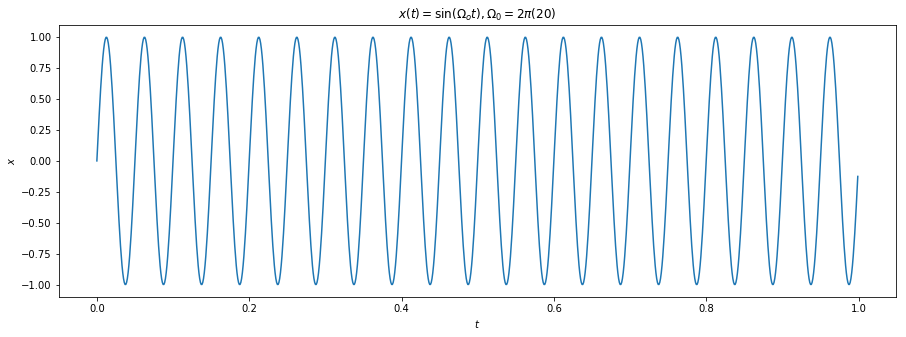

In [166]:
fig = plt.figure(figsize=(15, 5))
plt.plot(t, x)
plt.xlabel(r"$t$")
plt.ylabel(r"$x$")
plt.title(r"$x(t) = \sin(\Omega_o t), \Omega_0 = 2\pi(20)$")
plt.show()

## Sampling

In [169]:
from math import ceil, floor

def sample_signal(signal, t, fs):
    T = 2 * np.pi / fs
    n = np.arange(ceil(t[0] / T), floor(t[-1] / T))
    print()
    return np.array([x[np.argmin(abs(t - n * T))] for n in n]), n * T


def plot_with_sample(src, t, sample, n, title=""):
    fig = plt.figure(figsize=(15, 5))
    ax = plt.gca()
    ax.plot(t, src, label="Source")
    ax.stem(n, sample, label="Sample", linefmt="y--", markerfmt="yo")
    ax.set_ylabel(r"$x(t)$")
    ax.set_xlabel(r"$t$")
    ax.legend()
    ax.set_title("Sampling with %s" % title)
    plt.show()


### $\Omega_s = 2\pi(25)$

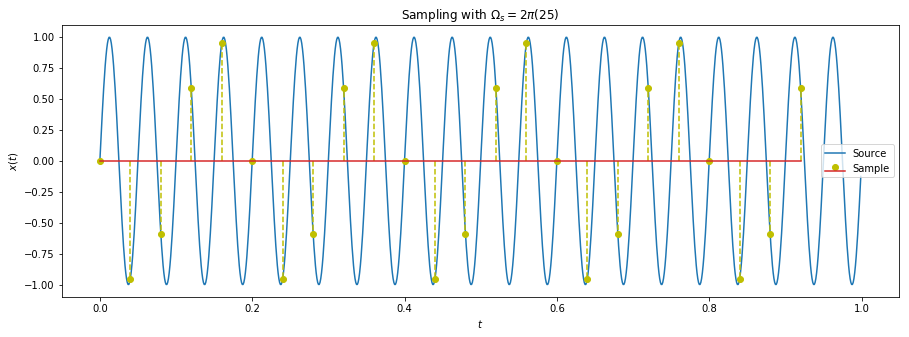

In [170]:
x_25, n_25 = sample_signal(x, t, 2 * np.pi * 25)
plot_with_sample(x, t, x_25, n_25, r"$\Omega_s = 2\pi(25)$")

Thus $\Omega_s = 2\pi(25) \ngtr 2\Omega_0 = 2 * 2\pi(20)$, aliasing will happen.

### $\Omega_s = 2\pi(50)$

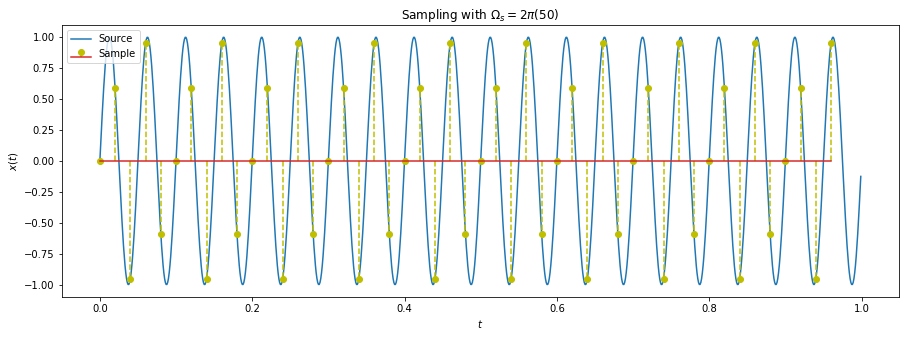

In [171]:
x_50, n_50 = sample_signal(x, t, 2 * np.pi * 50)
plot_with_sample(x, t, x_50, n_50, r"$\Omega_s = 2\pi(50)$")

Thus $\Omega_s = 2\pi(50) > 2\Omega_0 = 2 * 2\pi(20)$, aliasing won't happen.

## Reshaping

In [157]:
def reshape(sample, n, t, fs):
    return np.array([
        sum([sample[i] * np.sin(fs * (t - n[i]) / 2) / (fs * (t - n[i]) / 2) for i in range(len(sample))
    ]) for t in t])


def plot_reshaped(src, reshaped, t, title=""):
    fig = plt.figure(figsize=(15, 5))
    ax = plt.gca()
    ax.plot(t, src, label="Source")
    ax.plot(t, reshaped, "y--", label="Reshaped")
    ax.set_ylabel(r"$x(t)$")
    ax.set_xlabel(r"$t$")
    ax.legend()
    ax.set_title("Reshaping " % title)
    plt.show()


### $\Omega_s = 2\pi(25)$

/Users/hadi/Codes/sig2/.env/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


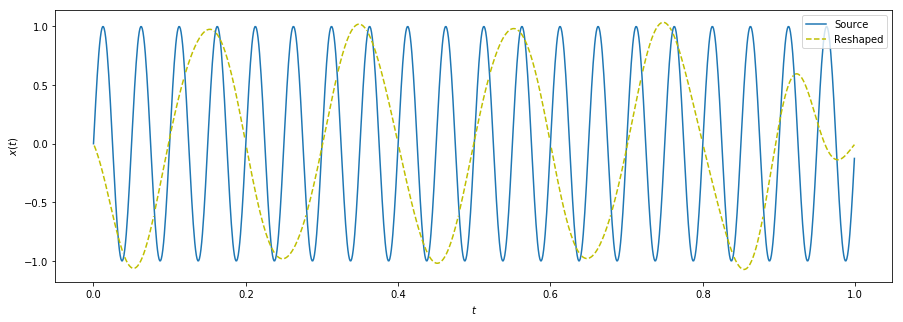

In [158]:
x_r_25 = reshape(x_25, n_25, t, 2 * np.pi * 25)
plot_reshaped(x, x_r_25, t)

As expected, aliasing happened.

### $\Omega_s = 2\pi(50)$

/Users/hadi/Codes/sig2/.env/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


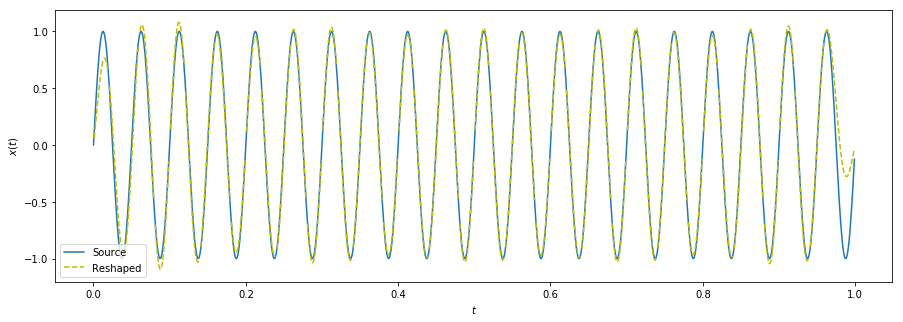

In [159]:
x_r_50 = reshape(x_50, n_50, t, 2 * np.pi * 50)
plot_reshaped(x, x_r_50, t)